<h1 style="font-size:300%; background-color:#ffe4b5; color:#4b0082; text-align:center; line-height : 60px;">
Técnicas de segmentación</h1>

<br><br>
<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; ">Juan Camilo Santana Salgado<br></p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Ingeniería Mecatrónica</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>18 de abril de 2021</p>

In [1]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise as rn
from skimage import morphology as morph
from scipy import ndimage as ndi 

<h2 style="text-align:center">Transformada de Hough</h2>

### Identificación de líneas:

(<matplotlib.axes._subplots.AxesSubplot at 0x2734781c070>,
 <matplotlib.image.AxesImage at 0x27348a99ac0>)

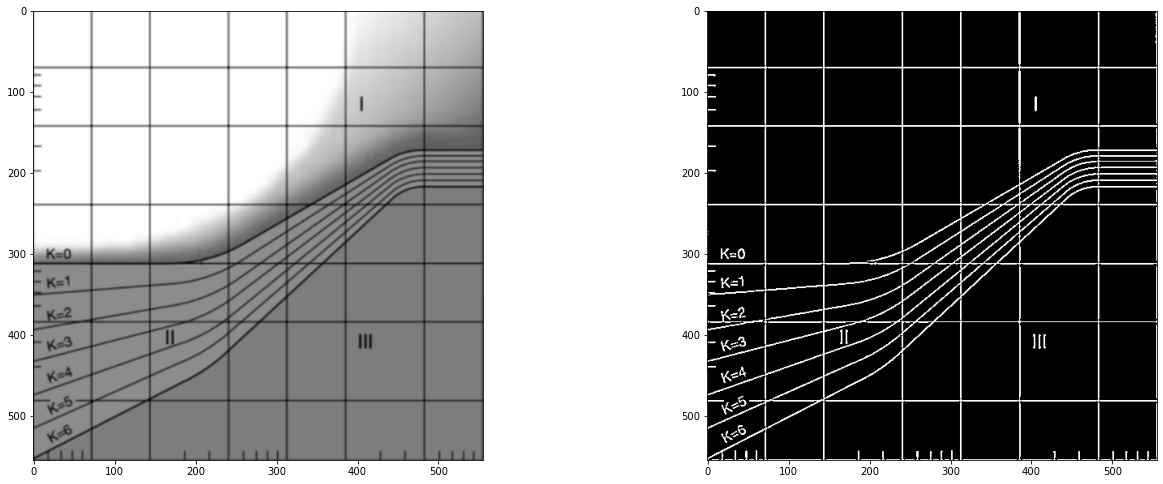

In [156]:
# Carga de imágenes
sonrisa=cv2.imread('Figs/shadow.png',0)
#sonrisa=cv2.equalizeHist(sonrisa)

# Filtro de suavizado Gaussiano
sonrisaG=cv2.GaussianBlur(sonrisa, (3, 3), 0)

# Umbralización adaptativa
sonrisaUBI=cv2.adaptiveThreshold(sonrisaG,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,3,3)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(121),plt.imshow(sonrisaG,cmap="gray")
plt.subplot(122),plt.imshow(sonrisaUBI,cmap="gray")

(<matplotlib.axes._subplots.AxesSubplot at 0x27349ee7220>,
 <matplotlib.image.AxesImage at 0x2734b411a60>)

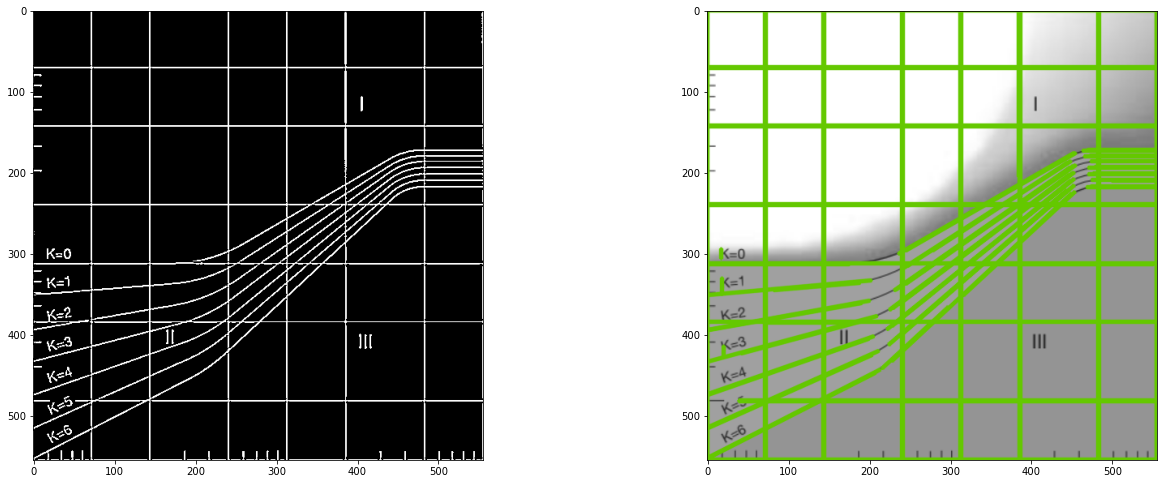

In [172]:
# Transformada de Hough
linesP = cv2.HoughLinesP(sonrisaUBI, 1, np.pi / 180, 50, None, 10, 10)

sonrisaGc=cv2.imread("Figs/shadow.png",1)

if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(sonrisaGc, (l[0], l[1]), (l[2], l[3]), (100,200,0), 3, cv2.LINE_AA)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(121),plt.imshow(sonrisaUBI,cmap='gray')
plt.subplot(122),plt.imshow(sonrisaGc,cmap='gray')

### Identificación de círculos:

(<matplotlib.axes._subplots.AxesSubplot at 0x27355d8c1f0>,
 <matplotlib.image.AxesImage at 0x27355f9fca0>)

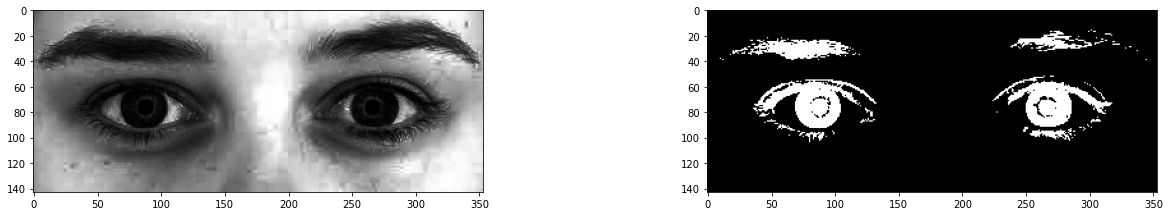

In [214]:
eyes=cv2.imread("Figs/eyes.jpg",0)
eyes=cv2.equalizeHist(eyes)

# Filtro de suavizado Gaussiano
eyesG=cv2.GaussianBlur(eyes, (3, 3), 0)

# Umbralización adaptativa
#eyesUB=cv2.adaptiveThreshold(eyesG,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,4)
ret,eyesUB=cv2.threshold(eyes,22,255,cv2.THRESH_BINARY_INV)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(121),plt.imshow(eyes,cmap="gray")
plt.subplot(122),plt.imshow(eyesUB,cmap="gray")

(<matplotlib.axes._subplots.AxesSubplot at 0x273563cc1f0>,
 <matplotlib.image.AxesImage at 0x27357624e50>)

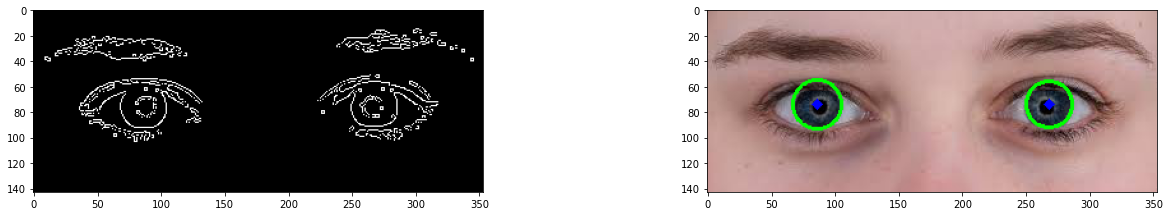

In [224]:
# Obtención de contornos
edges=cv2.Canny(eyesUB,50,200)

# Transformada de Hough
circles=cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, minDist=120, param1=200, param2=10, minRadius=5, maxRadius=24)

eyesc=cv2.imread("Figs/eyes.jpg",1)
eyesc=cv2.cvtColor(eyesc,cv2.COLOR_BGR2RGB)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(eyesc, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(eyesc, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(121),plt.imshow(edges,cmap="gray")
plt.subplot(122),plt.imshow(eyesc,cmap="gray")

<h2 style="text-align:center">Transformada <i>watershed</i></h2>

(<matplotlib.axes._subplots.AxesSubplot at 0x1f690377040>,
 Text(0.5, 1.0, 'Filtrado morfológico'))

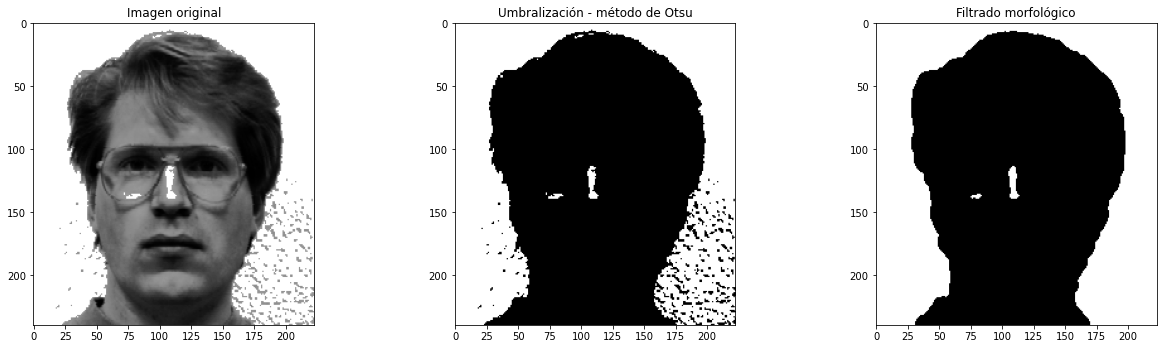

In [2]:
from skimage import segmentation as sgm

# Lectura de imagen
cara=cv2.imread("Figs/neutro.png",1)
face=cv2.imread("Figs/neutro.png",0)
face=cv2.equalizeHist(face)

# Remoción de ruido
ret,faceU=cv2.threshold(face,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))

opening = cv2.morphologyEx(faceU,cv2.MORPH_OPEN,kernel, iterations = 1)
morphfil = cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel2, iterations = 1)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(131),plt.imshow(face,cmap="gray"),plt.title("Imagen original")
plt.subplot(132),plt.imshow(faceU,cmap="gray"),plt.title("Umbralización - método de Otsu")
plt.subplot(133),plt.imshow(morphfil,cmap="gray"),plt.title("Filtrado morfológico")

(<matplotlib.axes._subplots.AxesSubplot at 0x1f68b9fad90>,
 <matplotlib.image.AxesImage at 0x1f6906b12b0>)

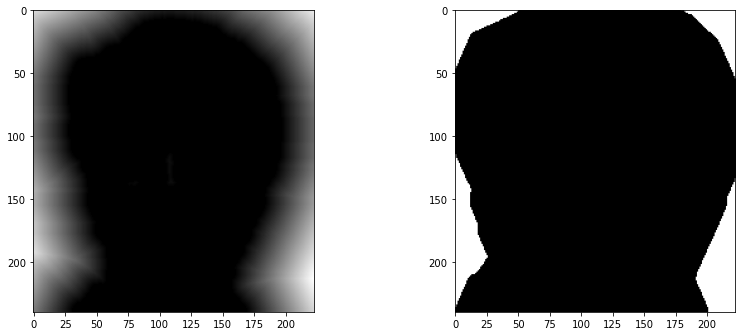

In [3]:
# Identificación de "background"
surebg=cv2.dilate(faceU,kernel,iterations=3)

# Identificación de "foreground"
dtf=cv2.distanceTransform(morphfil,cv2.DIST_L2,3)
ret,surefg=cv2.threshold(dtf,0.5*dtf.max(),255,0)
surefg=np.uint8(surefg)

# Región desconocida
unknown=cv2.subtract(surebg,surefg)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(131),plt.imshow(dtf,cmap="gray")
plt.subplot(132),plt.imshow(surefg,cmap="gray")

(<matplotlib.axes._subplots.AxesSubplot at 0x1f68b9faf70>,
 <matplotlib.image.AxesImage at 0x1f69072b6a0>)

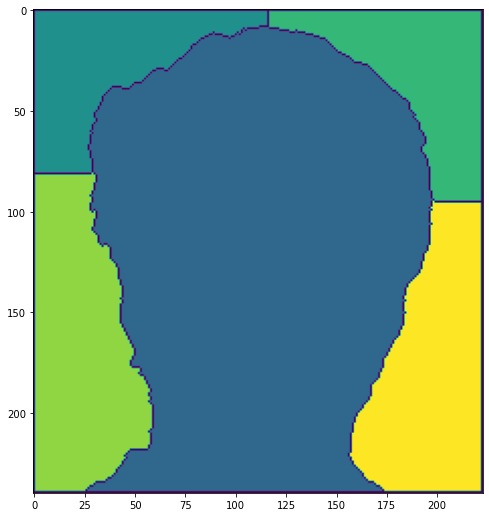

In [4]:
# Etiquetado
ret,etiqs=cv2.connectedComponents(surefg)
etiqs=etiqs+1 # para etiquetar el fondo como 1 y no 0
etiqs[unknown==255]=0 # para etiquetar la región desconocida como 0 (no se sabe si es bg o fg)

# Transformada watershed
facews=cv2.watershed(cara,etiqs)
cara[etiqs == -1] = [255,0,0]

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(121),plt.imshow(facews)